> # **DIGIT CLASSIFICARION USING ARTIFICIAL NEURAL NETWORK**
> In this tutorial, we'll create an `artificial neural network (ANN)` for `digit classification` using `TensorFlow` and `Keras`. We'll leverage the built-in MNIST dataset for training and evaluation.

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

import warnings
warnings.filterwarnings('ignore')

> ### DATASET OVERVIEW
> - In this dataset, each image is organized as a `28x28 grid of pixel values ranging from 0 to 255`. These values represent the `grayscale intensity of each pixel` in the image.<br><br>
> - To train a `deep neural network effectively`, it's crucial that `all features are on the same scale and within a consistent range`. Therefore, we normalize the pixel values by dividing them by 255, ensuring that each feature is scaled to the range [0, 1].

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train = X_train / 255
X_test = X_test / 255

<hr>

> ### ARTIFICIAL NEURAL NETWORK ARCHITECTURE
> - `Flatten Layer`: The input layer flattens the 28x28 image into a 1-dimensional array of 784 elements. This prepares the data for the fully connected layers.
> - `Dense Layer (784 units, ReLU activation)`: This fully connected layer has 784 neurons, each applying the ReLU (Rectified Linear Unit) activation function to introduce non-linearity and help the model learn complex patterns.
> - `Dense Layer (32 units, ReLU activation)`: The second dense layer has 32 neurons, also using the ReLU activation function. This layer further refines the learned features and helps capture more abstract representations.
> - `Dense Layer (10 units, Softmax activation)`: The final layer has 10 neurons, corresponding to the 10 digit classes (0-9). It uses the Softmax activation function to output a probability distribution over these classes, indicating the likelihood of each digit being present in the input image.

In [4]:
model = Sequential()

model.add(Flatten(input_shape = (28, 28)))  # Transformation Layer
model.add(Dense(784, activation='relu'))    # Hidden Layer 1
model.add(Dense(32, activation='relu'))     # Hidden Layer 2
model.add(Dense(10, activation='softmax'))  # Output Layer

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 640,890 (2.44 MB)

 Trainable params: 640,890 (2.44 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

<HR>

> ### MODEL TRAINING AND PREDICTION
> The model's predictions are expressed as probabilities for each digit class. To obtain the final classification result, we need to convert these probabilities into discrete classes ranging from 0 to 9.

In [6]:
history = model.fit(X_train, y_train, epochs = 10, verbose = 1, validation_split = 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8869 - loss: 0.3806 - val_accuracy: 0.9653 - val_loss: 0.1171
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9729 - loss: 0.0892 - val_accuracy: 0.9671 - val_loss: 0.1087
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9825 - loss: 0.0560 - val_accuracy: 0.9740 - val_loss: 0.0878
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9879 - loss: 0.0395 - val_accuracy: 0.9739 - val_loss: 0.0920
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9911 - loss: 0.0261 - val_accuracy: 0.9752 - val_loss: 0.0971
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9921 - loss: 0.0229 - val_accuracy: 0.9760 - val_loss: 0.0997
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9937 - loss: 0.0205 - val_accuracy: 0.9780 - val_loss: 0.0931
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9945 - loss: 0

> Make sure to `increase the number of epochs` for `better Accuracy`

In [7]:
model.predict(X_test)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([4.6838916e-13, 1.2266864e-12, 6.9533421e-11, 3.0568877e-11,
       5.1902817e-18, 9.0910860e-15, 7.7054155e-15, 9.9999994e-01,
       1.4772018e-12, 2.2924802e-10], dtype=float32)

In [8]:
y_pred = model.predict(X_test).argmax(axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [9]:
accuracy_score(y_test, y_pred)

0.9795

<hr>

> ### ANALYSIS OF LOSS AND ACCURACY
> The `history` object records the values of metrics and loss for each epoch based on the configurations specified in the compile method.

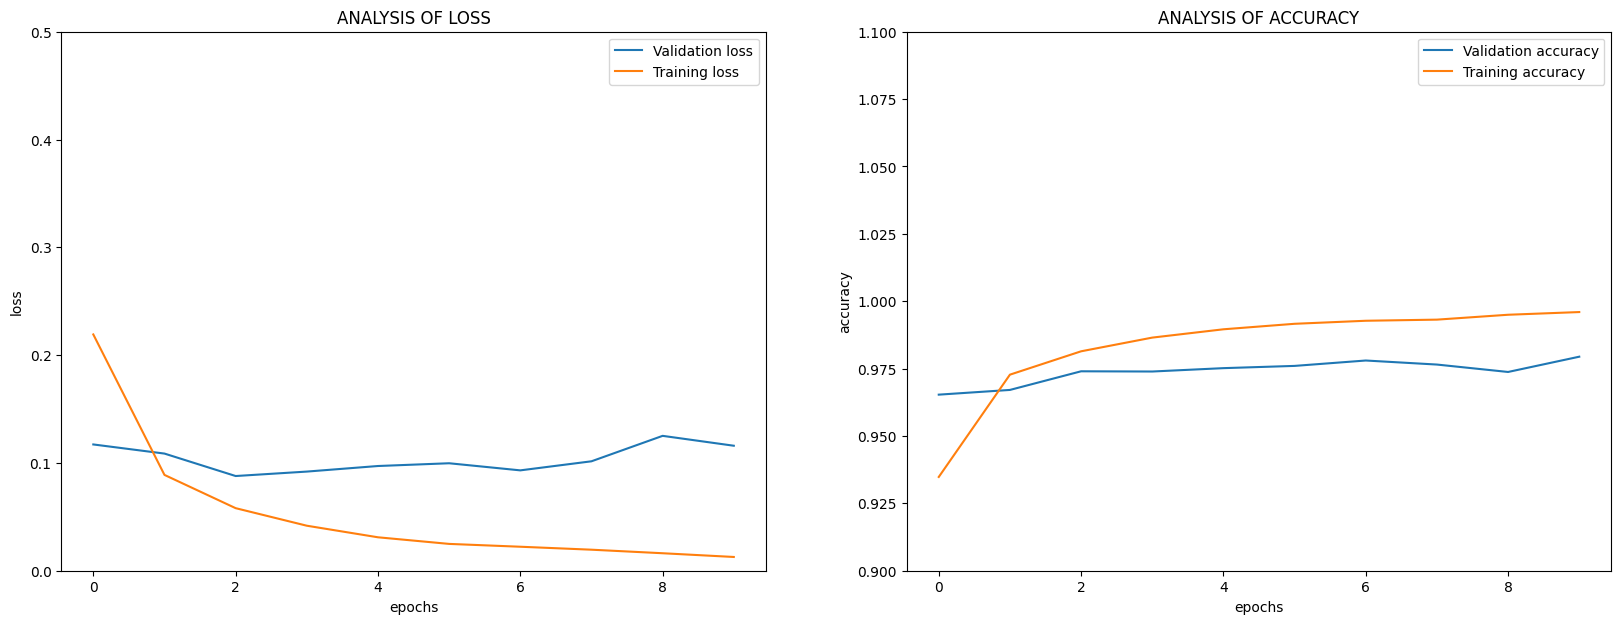

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols = 2)

fig.set_figwidth(20)
fig.set_figheight(7)

ax[0].plot(history.history['val_loss'], label = 'Validation loss')
ax[0].plot(history.history['loss'], label = 'Training loss')
ax[0].legend()
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].set_ylim(0, 0.5)
ax[0].set_title('ANALYSIS OF LOSS')

ax[1].plot(history.history['val_accuracy'], label = 'Validation accuracy')
ax[1].plot(history.history['accuracy'], label = 'Training accuracy')
ax[1].legend()
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].set_ylim(0.9, 1.1)
ax[1].set_title('ANALYSIS OF ACCURACY')

fig.show()